









































































































































# Выбор локации для скважины

Нефтедобывающая компания поставила задачу найти наиболее подходящий региона для разработки новых скважин, который, вероятно, принесет наибольший доход.

Имеются данные проб нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
#Загрузка библиотек
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Загрузка данных
data_0 = pd.read_csv('C:/Users/Alex/Documents/datasets/geo_data_0.csv')
display(data_0.describe())
data_0.info()
display(data_0.head())
print()
print('Дубликаты:', data_0.duplicated().sum())
print('Пропуски:', data_0.isna().sum())
print(data_0['id'].value_counts().sort_values(ascending=False))
#проверим данные с дублированными id
data_0[data_0['id'].duplicated(keep=False)].sort_values("id")

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



Дубликаты: 0
Пропуски: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
bsk9y    2
AGS9W    2
74z30    2
HZww2    2
QcMuo    2
        ..
NvgLb    1
d2i0X    1
ox020    1
ooRbS    1
RoDPE    1
Name: id, Length: 99990, dtype: int64


,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [3]:
data_1 = pd.read_csv('C:/Users/Alex/Documents/datasets/geo_data_1.csv')
display(data_1.describe())
data_1.info()
display(data_1.head())
#print()
print('Дубликаты:', data_1.duplicated().sum())
print('Пропуски:', data_1.isna().sum())
print(data_1['id'].value_counts().sort_values(ascending=False))
#проверим данные с дублированными id
data_1[data_1['id'].duplicated(keep=False)].sort_values('id')

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Дубликаты: 0
Пропуски: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
bfPNe    2
LHZR0    2
wt4Uk    2
5ltQ6    2
RWH12    1
        ..
buVBz    1
I4rBl    1
XEc2G    1
aO7MH    1
YaGej    1
Name: id, Length: 99996, dtype: int64


,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [4]:
data_2 = pd.read_csv('C:/Users/Alex/Documents/datasets/geo_data_2.csv')
display(data_2.describe())
data_2.info()
display(data_2.head())
print()
print('Дубликаты:', data_2.duplicated().sum())
print('Пропуски:', data_2.isna().sum())

#проверим данные с дублированными id
data_2[data_2['id'].duplicated(keep=False)].sort_values('id')

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



Дубликаты: 0
Пропуски: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


,id,f0,f1,f2,product
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641


In [5]:
#Удаление пропусков
data_0 = data_0.drop_duplicates(subset='id')
data_0.info()
data_1 = data_1.drop_duplicates(subset='id')
data_1.info()
data_2 = data_2.drop_duplicates(subset='id')
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
--

**Вывод**

В нашем распоряжении имеются данные о разведанных месторождениях трех регионов, в каждом из них 100 тысяч месторождений.

Таблицы содержат от 4 до 10 дубликатов по id. Вероятно, это ошибка ввода. Так как дубликаты составляют незначительный процент (<0,01%) от общего объема данных, мы можем их удалить. Пропусков в данных обнаружено не было.

## Обучение и проверка модели

### Разделение выборок

In [6]:
# Разозобьем данные на обучающую и валидационную выборки в соотношении 75:25
features_list = ['f0', 'f1', 'f2']

features_0 = data_0[features_list]
target_0 = data_0['product']

x_train_0, x_valid_0, y_train_0, y_valid_0 = train_test_split(features_0, target_0, test_size=0.25, random_state=42)

features_1 = data_1[features_list]
target_1 = data_1['product']

x_train_1, x_valid_1, y_train_1, y_valid_1 = train_test_split(features_1, target_1, test_size=0.25, random_state=42)

features_2 = data_2[features_list]
target_2 = data_2['product']

x_train_2, x_valid_2, y_train_2, y_valid_2 = train_test_split(features_2, target_2, test_size=0.25, random_state=42)

print(x_train_2.shape, x_valid_0.shape)

(74997, 3) (24998, 3)


### Обучение модели и сделайте предсказания на валидационной выборке

In [7]:
# Создадим функцию для обучения модели и расчета параметров
def linear_model(x_train, y_train, x_valid, y_valid):
    model = LinearRegression()
    model.fit(x_train, y_train)
    predicted_valid = model.predict(x_valid)

    compare = y_valid.reset_index()
    compare['preds'] = pd.DataFrame(predicted_valid).reset_index(drop=True)

    rmse = mean_squared_error(y_valid, predicted_valid) ** 0.5
    r2 = r2_score(y_valid, predicted_valid)
    mean_preds = compare['preds'].mean()
    mean_real = compare['product'].mean()
    
    print('Средний предсказанный запас сырья: %.2f' % mean_preds)
    print('Средний фактический запас сырья: %.2f' % mean_real)
    print('RMSE модели: %.2f' % rmse)
    print("Коэффициент детерминации: %.2f" % r2)
    return compare

In [8]:
#Обучим модель и сделаем предсказания на валидационной выборке для первого региона
print('Расчеты для первого региона')
compare_0 = linear_model(x_train_0, y_train_0, x_valid_0, y_valid_0)

Расчеты для первого региона
Средний предсказанный запас сырья: 92.61
Средний фактический запас сырья: 92.39
RMSE модели: 37.69
Коэффициент детерминации: 0.27


In [9]:
#Обучим модель и сделаем предсказания на валидационной выборке для второго региона
print('Расчеты для второго региона')
compare_1 = linear_model(x_train_1, y_train_1, x_valid_1, y_valid_1)

Расчеты для второго региона
Средний предсказанный запас сырья: 68.58
Средний фактический запас сырья: 68.58
RMSE модели: 0.89
Коэффициент детерминации: 1.00


In [10]:
#Обучим модель и сделаем предсказания на валидационной выборке для третьего региона
print('Расчеты для третьего региона')
compare_2 = linear_model(x_train_2, y_train_2, x_valid_2, y_valid_2)

Расчеты для третьего региона
Средний предсказанный запас сырья: 94.93
Средний фактический запас сырья: 95.25
RMSE модели: 40.08
Коэффициент детерминации: 0.19


**Вывод**

Модель сделала близкие к идеальным предсказания для второго региона и довольно поседственные для двух остальных. Масштабирование признаков не повлияло на качество предсказаний, поэтому использовано не было.

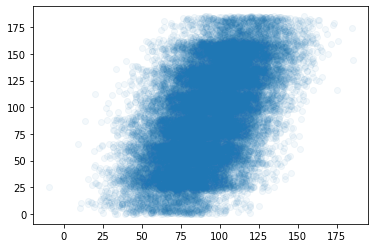

In [19]:
import matplotlib.pyplot as plt
plt.scatter(compare_0['preds'], compare_0['product'], alpha=0.05)

## Подготовка к расчёту прибыли

In [12]:
# Бюджет на разработку скважин в регионе
BUDGET_PER_REGION = 10000000000
#Доход с каждой единицы продукта, поскольку объём указан в тысячах баррелей.
PRODUCT_PROFIT = 450000 
# вероятность убытков меньше 2.5%. Потом выбрать регион с наибольшей средней прибылью.
ALPHA = 0.025
#Количество точек в регионе
N = 500
N_BEST = 200

In [13]:
#Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины
# Затраты - 10 млрд.руб., выручка - 450 тыс. с единицы продукта
product_zero = BUDGET_PER_REGION / N_BEST / PRODUCT_PROFIT
print('Достаточный объём сырья для безубыточной разработки новой скважины %.1f' % product_zero)

Достаточный объём сырья для безубыточной разработки новой скважины 111.1


**Вывод**

Для безубыточной разработки необходимо находить скважины с большим запасом сырья  111, что выше среднего в каждом из трех регионов: 93, 69, 95.

## Расчёт прибыли и рисков

### Функции для расчета

In [14]:
# Функция для расчета прибыли
def profit(df):
    # Выберем скважины с максимальными значениями предсказаний (ряды)
    best_wells = df.sort_values(by='preds', ascending=False).head(N_BEST)
    # Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям
    product_reserve = best_wells['product'].sum()
    # Рассчитаем прибыль для полученного объёма сырья
    profit = product_reserve * PRODUCT_PROFIT - BUDGET_PER_REGION
    return profit

In [15]:
#Функция Bootstrap  для расчета распределения прибыли
def bootstrap_profit(df):
    state = np.random.RandomState(12345) 
    values = []
    for i in range(1000):
        data_subsample = df.sample(N, replace=True, random_state=state)
        values.append(profit(data_subsample))

    values = pd.Series(values)
    mean_profit = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    negative = values[values < 0].count() / values.count()
    return mean_profit, lower, upper, negative

### Расчет рисков и прибыли для каждого региона

In [16]:
# Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли в первом регионе
mean_profit_0, lower_0, upper_0, val_0 = bootstrap_profit(compare_0)
print("Средняя прибыль первого региона: {:.0f}".format(mean_profit_0))
print("95%-доверительный интервал: {:.0f} - {:.0f}".format(lower_0, upper_0))
print('Вероятность убытков:', val_0)

Средняя прибыль первого региона: 417354353
95%-доверительный интервал: -96261928 - 933493095
Вероятность убытков: 0.059


In [17]:
# Прпроделаем то же самое для второго региона
mean_profit_1, lower_1, upper_1, val_1 = bootstrap_profit(compare_1)
print("Средняя прибыль первого региона: {:.0f}".format(mean_profit_1))
print("95%-доверительный интервал: {:.0f} - {:.0f}".format(lower_1, upper_1))
print('Вероятность убытков:', val_1)

Средняя прибыль первого региона: 432017870
95%-доверительный интервал: 51741836 - 863042250
Вероятность убытков: 0.01


In [18]:
# Рассчитаем таким же образом прибыль для третьего региона
mean_profit_2, lower_2, upper_2, val_2 = bootstrap_profit(compare_2)

print("Средняя прибыль первого региона: {:.0f}".format(mean_profit_2))
print("95%-доверительный интервал: {:.0f} - {:.0f}".format(lower_2, upper_2))
print('Вероятность убытков:', val_2)

Средняя прибыль первого региона: 356881965
95%-доверительный интервал: -186256155 - 892099106
Вероятность убытков: 0.089


**Вывод** 

Мы получили положительную предсказанную прибыль для всех трех регионов (417, 432 и 357 млн. рублей). Риски убытков минимальны для второго региона (1,0%), а расчетная прибыль максимальна. По этим параметрам второй регион для разработки выглядит наиболее перспективным.